In [1]:
from Agent import Agent
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd /Users/pengyuewang/deep-reinforcement-learning/python

/Users/pengyuewang/deep-reinforcement-learning/python


In [3]:
from unityagents import UnityEnvironment

In [4]:
cd /Users/pengyuewang/deep-reinforcement-learning/p1_navigation

/Users/pengyuewang/deep-reinforcement-learning/p1_navigation


# Agent with random action

In [ ]:
env = UnityEnvironment(file_name="Banana.app")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0 

action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

# Agent with trained weights

In [ ]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
agent = Agent(state_size = 37, action_size = 4, seed = 5)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(np.array(state), 0)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

# Train the Agent

In [5]:
def train_the_DQN(num_episodes = 200,eps_start=1.0, eps_end=0.01,eps_decay=0.995):
    score_list = []
    eps = eps_start
    for i_episode in range(1,num_episodes+1):
        print("Episode:",i_episode)
        env_info = env.reset(train_mode=True)[brain_name]
        score = 0
        state = env_info.vector_observations[0] 
        while True:
            action = agent.act(np.array(state), eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            score += reward
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            
            if done:
                break
        
        eps = max(eps_end, eps_decay*eps)       
        score_list.append(score)
        print("Score:",score)
        
    plt.figure(figsize = (12,6))
    plt.plot(np.arange(len(score_list)),score_list)
    plt.plot([0,1000],[13,13],c = 'r',lw = 3)
    env.close()
    
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    print("Weights saved!")
    return score_list

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode: 1
Score: 0.0
Episode: 2
Score: -1.0
Episode: 3
Score: 0.0
Episode: 4
Score: 1.0
Episode: 5
Score: 0.0
Episode: 6
Score: 1.0
Episode: 7
Score: 0.0
Episode: 8
Score: -2.0
Episode: 9
Score: -1.0
Episode: 10
Score: 0.0
Episode: 11
Score: 2.0
Episode: 12
Score: 1.0
Episode: 13
Score: 0.0
Episode: 14
Score: 1.0
Episode: 15
Score: 1.0
Episode: 16
Score: 2.0
Episode: 17
Score: 0.0
Episode: 18
Score: 1.0
Episode: 19
Score: 1.0
Episode: 20
Score: 0.0
Episode: 21
Score: -2.0
Episode: 22
Score: -2.0
Episode: 23
Score: 0.0
Episode: 24
Score: 0.0
Episode: 25
Score: 0.0
Episode: 26
Score: 0.0
Episode: 27
Score: 0.0
Episode: 28
Score: 1.0
Episode: 29
Score: 0.0
Episode: 30
Score: 2.0
Episode: 31
Score: 1.0
Episode: 32
Score: 1.0
Episode: 33
Score: 0.0
Episode: 34
Score: 1.0
Episode: 35
Score: -2.0
Episode: 36
Score: -1.0
Episode: 37
Score: 1.0
Episode: 38
Score: 1.0
Episode: 39
Score: 0.0
Episode: 40
Score: -1.0
Episode: 41
Score: 0.0
Episode: 42
Score: 5.0
Episode: 43
Score: -1.0
Episode: 44

Score: 4.0
Episode: 344
Score: 11.0
Episode: 345
Score: 4.0
Episode: 346
Score: 12.0
Episode: 347
Score: 12.0
Episode: 348
Score: 10.0
Episode: 349
Score: 11.0
Episode: 350
Score: 8.0
Episode: 351
Score: 10.0
Episode: 352
Score: 10.0
Episode: 353
Score: 13.0
Episode: 354
Score: 13.0
Episode: 355
Score: 14.0
Episode: 356
Score: 3.0
Episode: 357
Score: 9.0
Episode: 358
Score: 11.0
Episode: 359
Score: 11.0
Episode: 360
Score: 12.0
Episode: 361
Score: 10.0
Episode: 362
Score: 4.0
Episode: 363
Score: 12.0
Episode: 364
Score: 10.0
Episode: 365
Score: 14.0
Episode: 366
Score: 11.0
Episode: 367
Score: 13.0
Episode: 368
Score: 14.0
Episode: 369
Score: 7.0
Episode: 370
Score: 10.0
Episode: 371
Score: 13.0
Episode: 372
Score: 8.0
Episode: 373
Score: 12.0
Episode: 374
Score: 2.0
Episode: 375
Score: 11.0
Episode: 376
Score: 9.0
Episode: 377
Score: 10.0
Episode: 378
Score: 4.0
Episode: 379
Score: 6.0
Episode: 380
Score: 6.0
Episode: 381
Score: 5.0
Episode: 382
Score: 11.0
Episode: 383
Score: 14.0
Ep

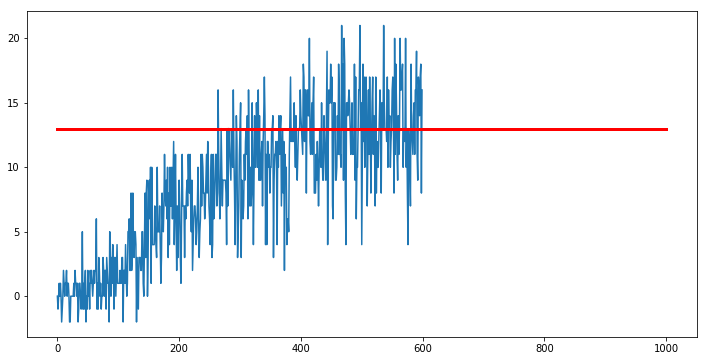

In [6]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
agent = Agent(state_size = 37, action_size = 4, seed = 0)
score_list = train_the_DQN(num_episodes = 600)